<a href="https://colab.research.google.com/github/ahoucbvtw/CNN-Kaggle-Pratice/blob/main/Intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 解壓縮圖片所在的zip檔
import zipfile
path = "drive/My Drive/Kaggle-Pratice/Intel_Image_Classification/archive.zip"
f = zipfile.ZipFile(path)
f.extractall("Intel")

In [ ]:
import pandas as pd
import os
# import shutil
# import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 建立答案的數字轉換
trans = [
        "Buildings",										
        "Forest",										
        "Glacier",										
        "Mountain",
        "Sea",
        "Street"
]

In [ ]:
path_Train = "Intel/seg_train/seg_train"
path_Test = "Intel/seg_test/seg_test"

In [ ]:
# 圖片預處理(製作Python產生器)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 製作一產生器將圖片Normalize
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   zoom_range = 0.2,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   fill_mode = "nearest")

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        path_Train,
        target_size = (150, 150),
        batch_size = 30,
        class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
        path_Test,
        target_size = (150, 150),
        batch_size = 50,
        class_mode = 'categorical')

In [ ]:
# 顯示generator內部自行標記的Label編號
label_map_train = (train_generator.class_indices)
label_map_test = (test_generator.class_indices)
print(label_map_train)
print(label_map_test)

In [ ]:
# 最好的訓練Epoch 42/150(loss: 0.3596 - accuracy: 0.8751 - val_loss: 0.4024 - val_accuracy: 0.8603)

# Model: "sequential_7"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d_74 (Conv2D)           (None, 150, 150, 64)      1792      
# _________________________________________________________________
# conv2d_75 (Conv2D)           (None, 150, 150, 128)     73856     
# _________________________________________________________________
# batch_normalization_40 (Batc (None, 150, 150, 128)     512       
# _________________________________________________________________
# max_pooling2d_42 (MaxPooling (None, 75, 75, 128)       0         
# _________________________________________________________________
# conv2d_76 (Conv2D)           (None, 75, 75, 128)       147584    
# _________________________________________________________________
# conv2d_77 (Conv2D)           (None, 75, 75, 256)       295168    
# _________________________________________________________________
# batch_normalization_41 (Batc (None, 75, 75, 256)       1024      
# _________________________________________________________________
# max_pooling2d_43 (MaxPooling (None, 37, 37, 256)       0         
# _________________________________________________________________
# conv2d_78 (Conv2D)           (None, 37, 37, 256)       590080    
# _________________________________________________________________
# conv2d_79 (Conv2D)           (None, 37, 37, 512)       1180160   
# _________________________________________________________________
# batch_normalization_42 (Batc (None, 37, 37, 512)       2048      
# _________________________________________________________________
# max_pooling2d_44 (MaxPooling (None, 18, 18, 512)       0         
# _________________________________________________________________
# conv2d_80 (Conv2D)           (None, 18, 18, 512)       2359808   
# _________________________________________________________________
# conv2d_81 (Conv2D)           (None, 18, 18, 1024)      4719616   
# _________________________________________________________________
# batch_normalization_43 (Batc (None, 18, 18, 1024)      4096      
# _________________________________________________________________
# max_pooling2d_45 (MaxPooling (None, 9, 9, 1024)        0         
# _________________________________________________________________
# conv2d_82 (Conv2D)           (None, 9, 9, 1024)        9438208   
# _________________________________________________________________
# batch_normalization_44 (Batc (None, 9, 9, 1024)        4096      
# _________________________________________________________________
# max_pooling2d_46 (MaxPooling (None, 4, 4, 1024)        0         
# _________________________________________________________________
# conv2d_83 (Conv2D)           (None, 4, 4, 100)         921700    
# _________________________________________________________________
# max_pooling2d_47 (MaxPooling (None, 2, 2, 100)         0         
# _________________________________________________________________
# global_average_pooling2d_7 ( (None, 100)               0         
# _________________________________________________________________
# dropout_7 (Dropout)          (None, 100)               0         
# _________________________________________________________________
# dense_14 (Dense)             (None, 50)                5050      
# _________________________________________________________________
# dense_15 (Dense)             (None, 6)                 306       
# =================================================================
# Total params: 19,745,104
# Trainable params: 19,739,216
# Non-trainable params: 5,888
# _________________________________________________________________

# Conv2D(64, 3, padding = "same", activation = "relu", input_shape = (150, 150, 3)),
#           Conv2D(128, 3, padding = "same", activation = "relu"),
#           BatchNormalization(),
#           MaxPooling2D(),
#           Conv2D(128, 3, padding = "same", activation = "relu"),
#           Conv2D(256, 3, padding = "same", activation = "relu"),
#           BatchNormalization(),
#           MaxPooling2D(),
#           Conv2D(256, 3, padding = "same", activation = "relu"),
#           Conv2D(512, 3, padding = "same", activation = "relu"),
#           BatchNormalization(),
#           MaxPooling2D(),
#           Conv2D(512, 3, padding = "same", activation = "relu"),
#           Conv2D(1024, 3, padding = "same", activation = "relu"),
#           BatchNormalization(),
#           MaxPooling2D(),
#           Conv2D(1024, 3, padding = "same", activation = "relu"),
#           BatchNormalization(),
#           MaxPooling2D(),
#           Conv2D(100, 3, padding = "same", activation = "relu"),
#           MaxPooling2D(),
#           GlobalAveragePooling2D(),
#           Dropout(0.4),
#           Dense(50, activation="relu"),
#           Dense(6, activation="softmax")

In [ ]:
# 建立CNN網路層
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

layers = [
          Conv2D(64, 3, padding = "same", activation = "relu", input_shape = (150, 150, 3)),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(128, 3, padding = "same", activation = "relu"),
          Conv2D(256, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(256, 3, padding = "same", activation = "relu"),
          Conv2D(512, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(512, 3, padding = "same", activation = "relu"),
          Conv2D(1024, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(1024, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(500, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          MaxPooling2D(),
          Conv2D(200, 3, padding = "same", activation = "relu"),
          Conv2D(100, 3, padding = "same", activation = "relu"),
          BatchNormalization(),
          GlobalAveragePooling2D(),
          Dropout(0.5),
          Dense(50, activation="relu"),
          Dense(6, activation="softmax")
]
model = Sequential(layers)
model.summary()

In [ ]:
# 畫model的流程圖
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
# model comple
model.compile(loss = "categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
# Training

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# ReduceLROnPlateau 訓練到一定程度所指定的參數若未沒有甚麼變化，則減少其學習參數的效率
callbacks = [
    ModelCheckpoint("drive/My Drive/Kaggle-Pratice/Intel_Image_Classification/Intel.h5", save_best_only = True),
    ReduceLROnPlateau(monitor = "val_accuracy", factor = 0.25, verbose = 1, patience = 7, min_lr = 0.001),
    EarlyStopping(patience = 10, restore_best_weights = True)
]

history = model.fit_generator(train_generator,
                    steps_per_epoch = 468,
                    epochs = 150,
                    verbose = 2,
                    validation_data = test_generator,
                    validation_steps = 60,
                    callbacks = callbacks)


# history = model.fit(x = train_generator,
#                  steps_per_epoch = 468,
#                  epochs = 150,
#                  verbose = 2,
#                  validation_data = test_generator,
#                  validation_steps = 60,
#                  callbacks = callbacks)

In [ ]:
model.save("drive/My Drive/Kaggle-Pratice/Intel_Image_Classification/Intel.h5")

In [ ]:
from tensorflow.keras.models import load_model
load = load_model("drive/My Drive/Kaggle-Pratice/Intel_Image_Classification/Intel.h5")

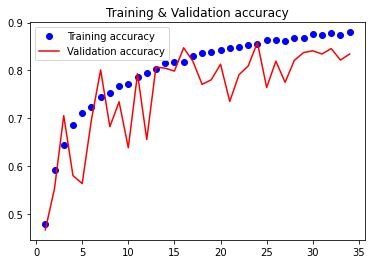

In [ ]:
# 顯示隨著時間訓練Training準確率和Validation準確率的變化

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, acc, "bo", label = "Training accuracy")
plt.plot(epochs, val_acc, "r", label = "Validation accuracy")
plt.title("Training & Validation accuracy")
plt.legend()
plt.show()

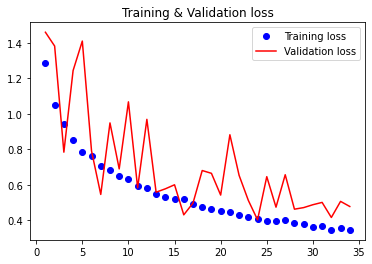

In [ ]:
# 顯示隨著時間訓練Training loss和Validation loss的變化

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) +1)

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "r", label = "Validation loss")
plt.title("Training & Validation loss")
plt.legend()
plt.show()

In [ ]:
# 讀取預測資料集的路徑以及標籤CSV檔
pre_df = pd.read_csv("drive/My Drive/Kaggle-Pratice/Intel_Image_Classification/Intel_pred.csv")
pre_df

,path,label
0,5.jpg,0
1,61.jpg,0
2,73.jpg,0
3,103.jpg,0
4,144.jpg,0
...,...,...
295,4562.jpg,5
296,4577.jpg,5
297,4583.jpg,5
298,4597.jpg,5


In [ ]:
# 建立全新圖片的預測資料集npmpy轉換
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

def dataset(df_path,df_label):
    img_size = 150
    x_pre = []
    y_pre = []
    pic_dir = "Intel/seg_pred/seg_pred/"
    for x in df_path:
        img = load_img(os.path.join(pic_dir, x), target_size = (img_size,img_size))
        img = np.array(img)
        img = img / 255
        x_pre.append(img)

    bb = np.array(x_pre)
    print("預測資料集圖片shape : ", bb.shape)

    for x in df_label:
        y_pre.append(int(x))

    ccc = np.array(y_pre)
    cc = to_categorical(ccc, num_classes = 6)
    print("預測資料集categorical標籤shape : ", cc.shape)

    return bb, cc, ccc

predict_x, predict_y_categorical, predict_y = dataset(pre_df["path"], pre_df["label"])

預測資料集圖片shape :  (300, 150, 150, 3)
預測資料集categorical標籤shape :  (300, 6)


In [ ]:
# 利用額外的預測圖片去測試model的準確率
model.evaluate(x = predict_x, y = predict_y_categorical)

10/10 [==============================] - 1s 51ms/step - loss: 0.3126 - accuracy: 0.8867


[0.3125638961791992, 0.8866666555404663]

In [ ]:
# 將已categorical預測資料的label做預測並選取最大值
prediction = model.predict(predict_x, verbose = 2)
pre = np.argmax(prediction, axis = -1)
pre

10/10 - 0s


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3,
       2, 2, 3, 4, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 4, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 4, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 1, 0, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
# 製作預測資料集的混淆矩陣
# 從混淆矩陣可以看出大樓圖與街道圖確實會有些許相似
# 但冰川和山這2個原先在訓練資料集內本身就有相似之處,像是雪山等等
# 因此這2者的辨識率便會下降
from sklearn.metrics import  confusion_matrix

mat = confusion_matrix(predict_y, pre)

CM = pd.DataFrame(mat, 
       columns=["{}(預測)".format(trans[i]) for i in range(6)],
       index=["{}(真實)".format(trans[i]) for i in range(6)])
CM

,Buildings(預測),Forest(預測),Glacier(預測),Mountain(預測),Sea(預測),Street(預測)
Buildings(真實),44,0,0,1,0,5
Forest(真實),0,50,0,0,0,0
Glacier(真實),0,1,47,1,1,0
Mountain(真實),0,1,10,37,2,0
Sea(真實),0,0,4,2,44,0
Street(真實),2,3,0,0,1,44


In [ ]:
print(f"{trans[0]}準確率(%) = ", round(CM[f"{trans[0]}(預測)"][0]/sum(CM[f"{trans[0]}(預測)"]),3)*100)
print(f"{trans[1]}準確率(%) = ", round(CM[f"{trans[1]}(預測)"][1]/sum(CM[f"{trans[1]}(預測)"]),3)*100)
print(f"{trans[2]}準確率(%) = ", round(CM[f"{trans[2]}(預測)"][2]/sum(CM[f"{trans[2]}(預測)"]),3)*100)
print(f"{trans[3]}準確率(%) = ", round(CM[f"{trans[3]}(預測)"][3]/sum(CM[f"{trans[3]}(預測)"]),3)*100)
print(f"{trans[4]}準確率(%) = ", round(CM[f"{trans[4]}(預測)"][4]/sum(CM[f"{trans[4]}(預測)"]),3)*100)
print(f"{trans[5]}準確率(%) = ", round(CM[f"{trans[5]}(預測)"][5]/sum(CM[f"{trans[5]}(預測)"]),3)*100)

Buildings準確率(%) =  95.7
Forest準確率(%) =  90.9
Glacier準確率(%) =  77.0
Mountain準確率(%) =  90.2
Sea準確率(%) =  91.7
Street準確率(%) =  89.8


輸入網址 : https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTumGyuis5bsX52uMnQxZbaS5sQ3JNBCYl7XA&usqp=CAU
所有選項的預測機率 :  [9.7041205e-04 2.1539523e-05 6.9916570e-01 2.9845181e-01 1.2851128e-03
 1.0553692e-04]
Buildings 的機率 :  0.001
Forest 的機率 :  0.0
Glacier 的機率 :  0.699
Mountain 的機率 :  0.298
Sea 的機率 :  0.001
Street 的機率 :  0.0
最高機率 :  Glacier


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


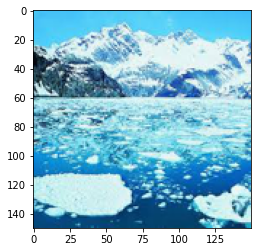

In [ ]:
import requests
from PIL import Image

url = input("輸入網址 : ")
# stream=True: 檔案傳回來, 不加純文字
# stream=True: response.raw stream=False: response.text
# verify=False: 別跟我說不安全
response = requests.get(url, stream = True, verify = False)

img = Image.open(response.raw).resize((150, 150))
test = np.array(img).reshape(1, 150, 150, 3) / 255
p = model.predict(test)[0]
print("所有選項的預測機率 : ", p)

for n, prob in zip(trans, p):
    print(n, "的機率 : ", round(prob, 3))

ans = model.predict_classes(test)[0]
print("最高機率 : ", trans[ans])
plt.imshow(img)